In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
x_train, y_train = load_mnist('',kind='train')
x_test, y_test = load_mnist('',kind='t10k')

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
model = Sequential([
    tf.keras.Input(shape=(784,1)),
    tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
])
chanDim = 1
# first CONV => RELU => CONV => RELU => POOL layer set
model.add(layers.Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)))
model.add(layers.Activation("relu"))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.Conv2D(32, (3, 3), padding="same"))
model.add(layers.Activation("relu"))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
# second CONV => RELU => CONV => RELU => POOL layer set
model.add(layers.Conv2D(64, (3, 3), padding="same"))
model.add(layers.Activation("relu"))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.Conv2D(64, (3, 3), padding="same"))
model.add(layers.Activation("relu"))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
# first (and only) set of FC => RELU layers
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation("relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# softmax classifier
model.add(layers.Dense(10))
model.add(layers.Activation("softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        1

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 251s 134ms/step - loss: 0.4867 - accuracy: 0.8317
Epoch 2/7
1875/1875 [==============================] - 254s 136ms/step - loss: 0.3148 - accuracy: 0.8875
Epoch 3/7
1875/1875 [==============================] - 253s 135ms/step - loss: 0.2743 - accuracy: 0.9001
Epoch 4/7
1875/1875 [==============================] - 258s 138ms/step - loss: 0.2545 - accuracy: 0.9090
Epoch 5/7
1875/1875 [==============================] - 262s 140ms/step - loss: 0.2309 - accuracy: 0.9172
Epoch 6/7
1875/1875 [==============================] - 458s 244ms/step - loss: 0.2180 - accuracy: 0.9203
Epoch 7/7
1875/1875 [==============================] - 339s 181ms/step - loss: 0.2068 - accuracy: 0.9250


In [9]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1,batch_size = 1)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 26s 3ms/step - loss: 0.2064 - accuracy: 0.9252

Test accuracy: 0.9251999855041504


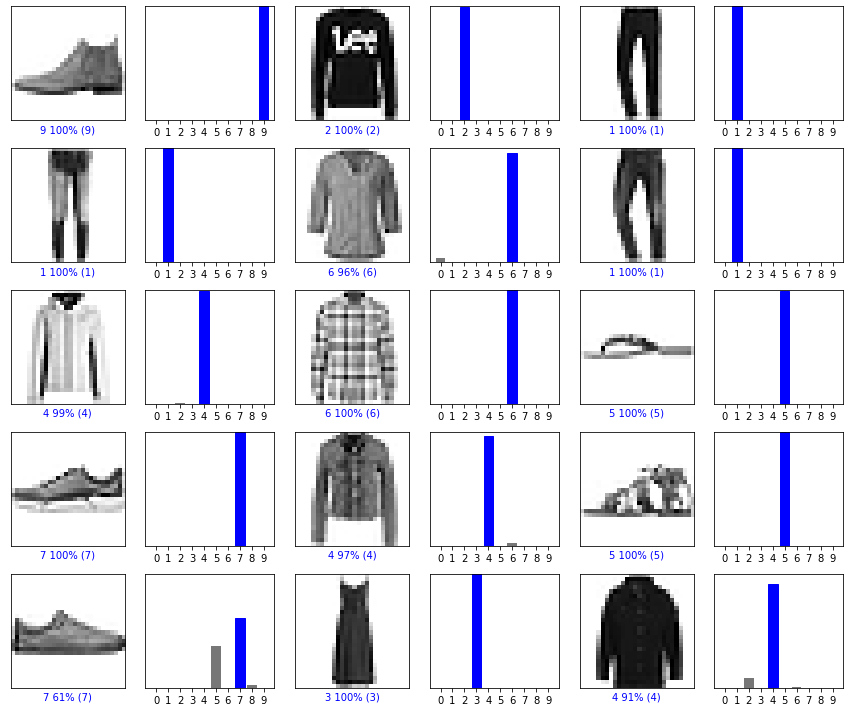

In [10]:
import matplotlib.pyplot as plt
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape((28,28))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
predictions = model.predict(x_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()